### Objective is to predict the car prices based on features
- dataset link : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets_33080_43333_car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.select_dtypes(include= np.object).head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [6]:
def get_unique_values(dataset):
    df = dataset.select_dtypes(include = np.object)
    cols = list(df.columns)
    for i in cols:
        print('{}: {}'.format(i,df[i].unique()), '\n')

In [7]:
get_unique_values(data)

Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

In [8]:
data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [9]:
data['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [10]:
# dropping unnecessary attributes
data.drop(columns=['Car_Name'], axis = 1,inplace= True)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data.iloc[:, 1:4].describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0


### Exploratory Data Analysis

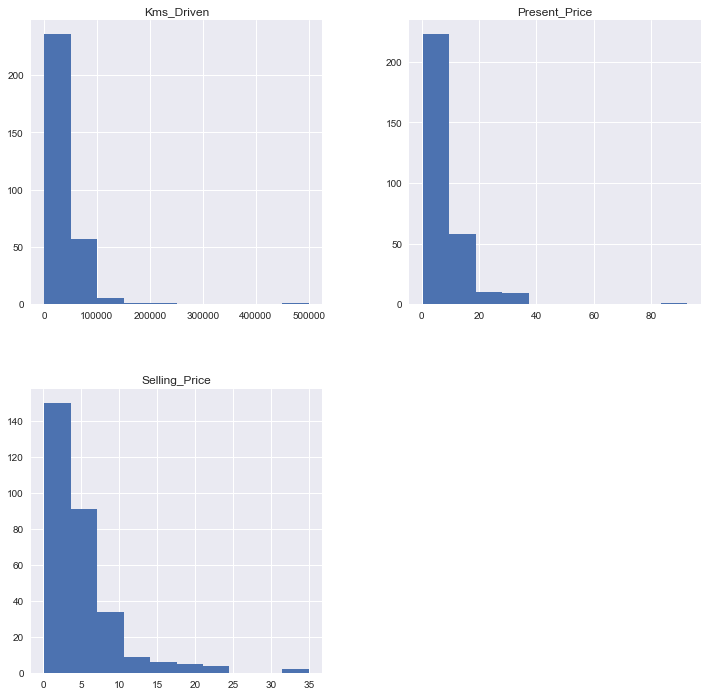

In [12]:
plt.style.use('seaborn')
data.iloc[:, 1:4].hist(figsize = (12,12))
plt.show()

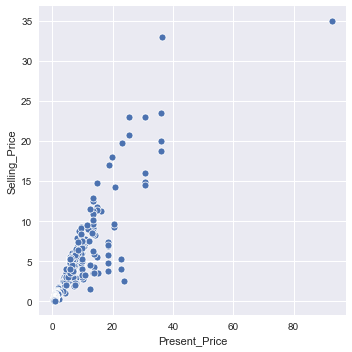

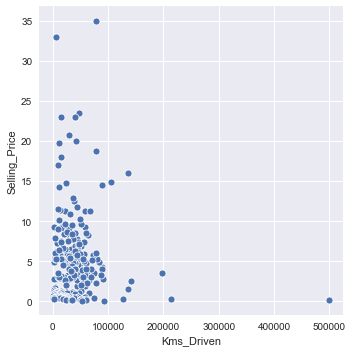

In [13]:
## scatter plot for linearity check and spread on target variable/attribute
for i in list(data.columns)[2:4]:
    sns.relplot(x = i, y = 'Selling_Price', data= data)
    plt.show()

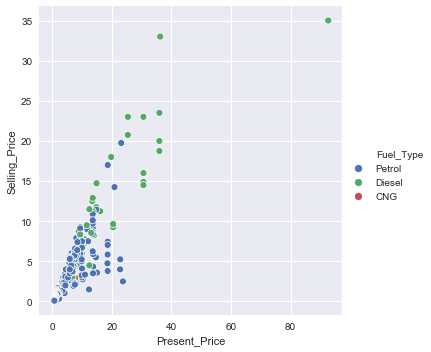

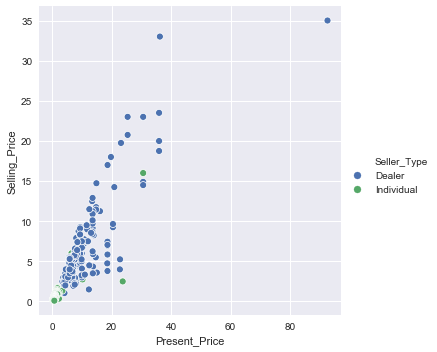

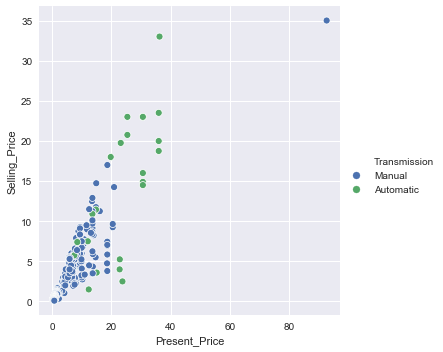

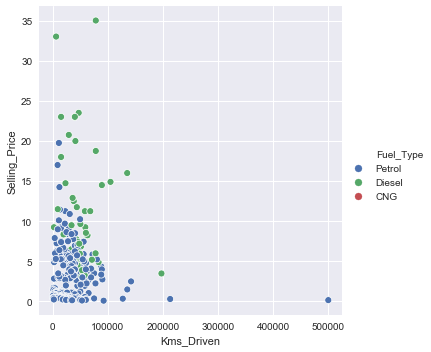

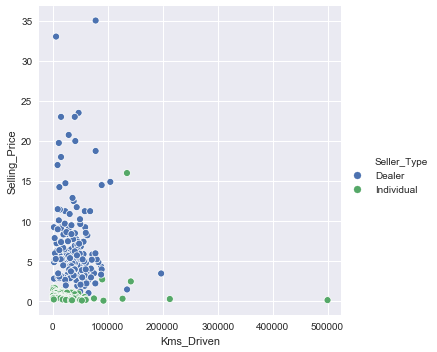

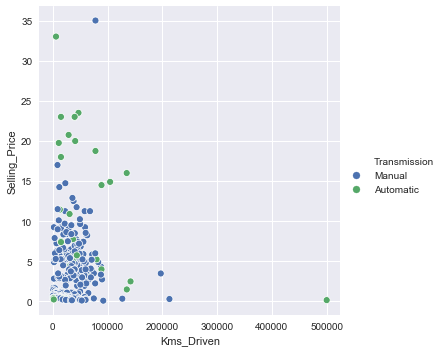

In [14]:
## plotting by category

for i in list(data.columns)[2:4]:
    for j in list(data.select_dtypes(include= np.object).columns):
        sns.relplot(x = i, y = 'Selling_Price',hue = j,  data= data)
    plt.show()

In [15]:
## correlation
data.iloc[:, [0,2,3]].corr()

,Year,Present_Price,Kms_Driven
Year,1.000000,-0.047584,-0.524342
Present_Price,-0.047584,1.000000,0.203647
Kms_Driven,-0.524342,0.203647,1.000000


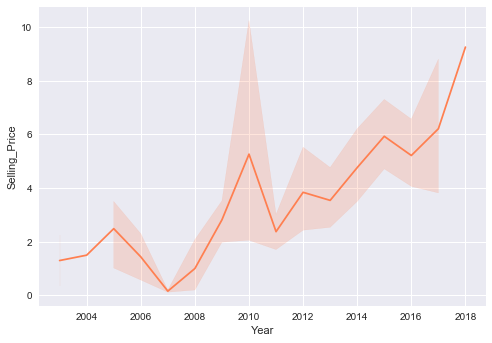

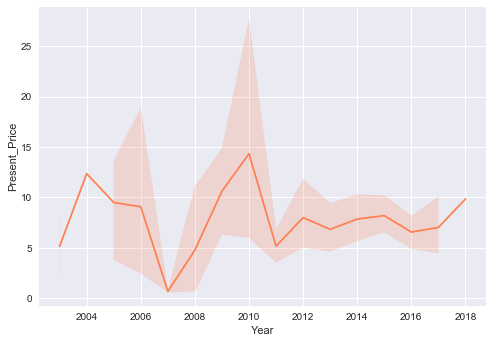

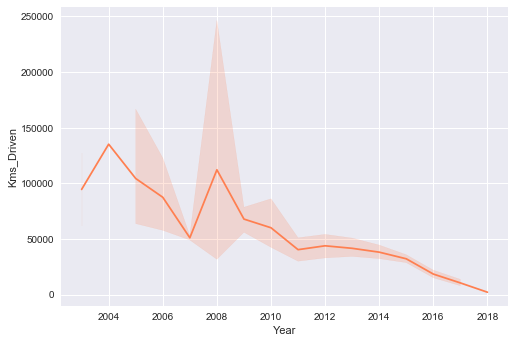

In [16]:
for i in list(data.columns)[1:4]:
    sns.lineplot(x = 'Year', y = i, data = data, color="coral")
    plt.show()


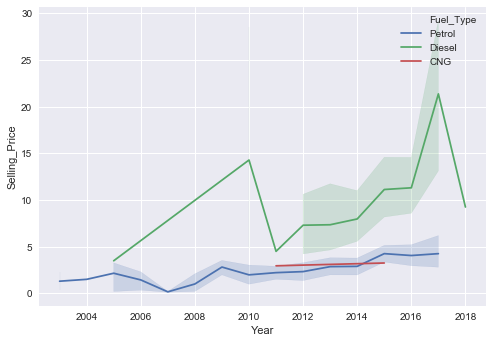

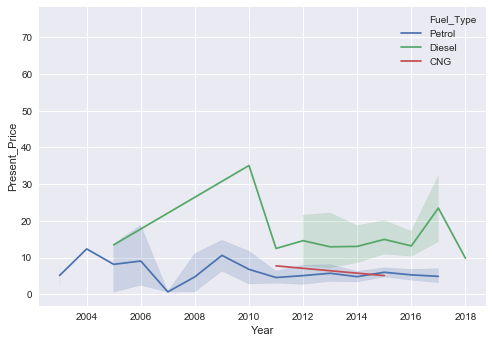

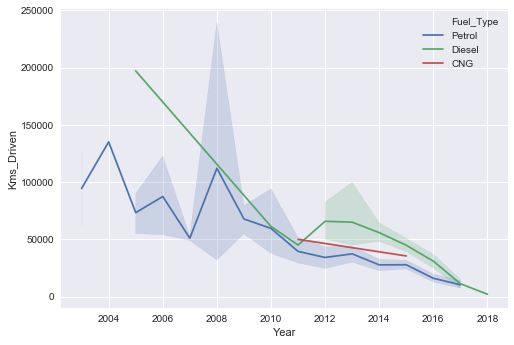

In [17]:
for i in list(data.columns)[1:4]:
    sns.lineplot(x = 'Year', y = i, data = data, hue = 'Fuel_Type' ,color="coral")
    plt.show()

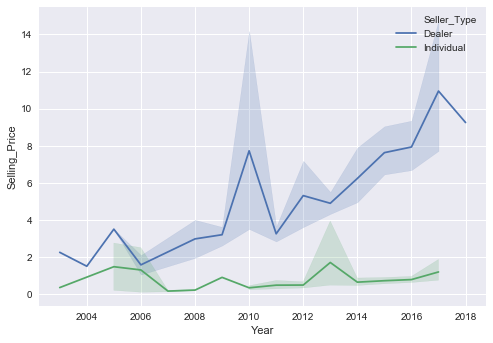

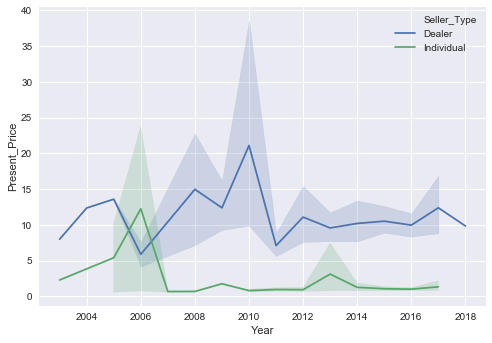

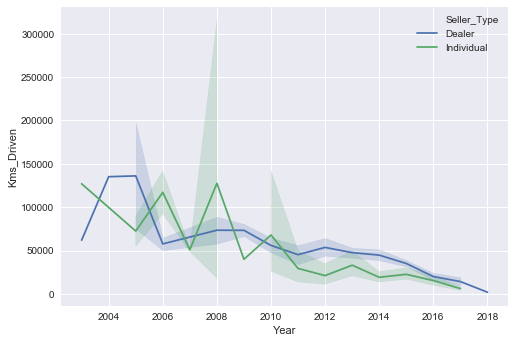

In [18]:
for i in list(data.columns)[1:4]:
    sns.lineplot(x = 'Year', y = i, data = data, hue = 'Seller_Type' ,color="coral")
    plt.show()

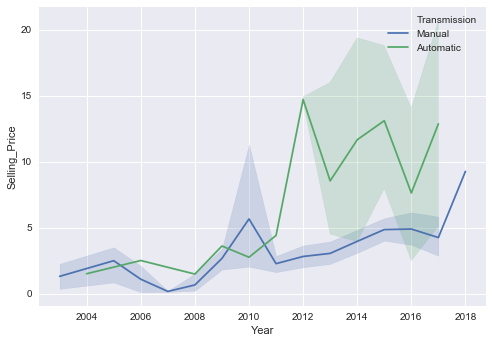

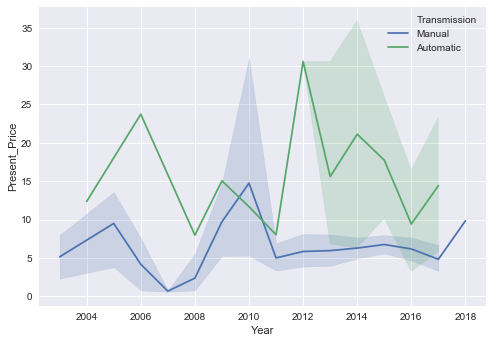

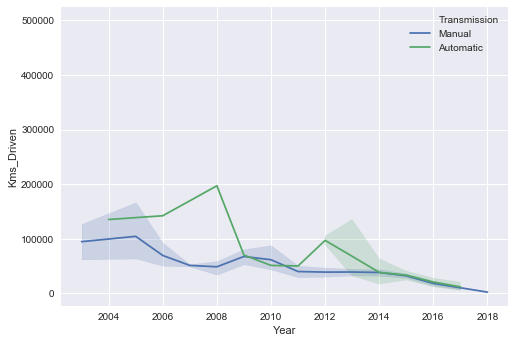

In [19]:
for i in list(data.columns)[1:4]:
    sns.lineplot(x = 'Year', y = i, data = data, hue = 'Transmission' ,color="coral")
    plt.show()

In [20]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
list(data.columns)[4:len(list(data.columns))]

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

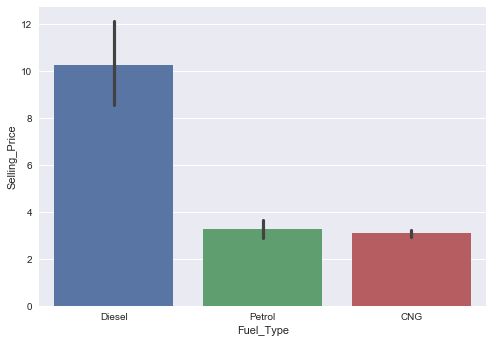

In [22]:
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = data, order = ['Diesel', 'Petrol', 'CNG'])
plt.show()

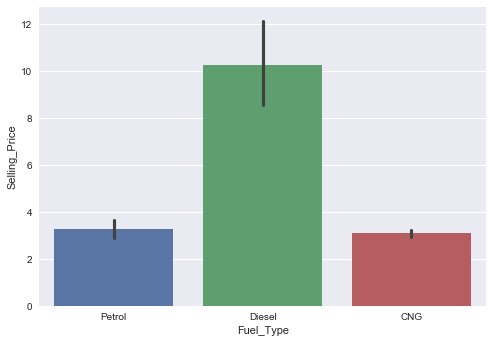

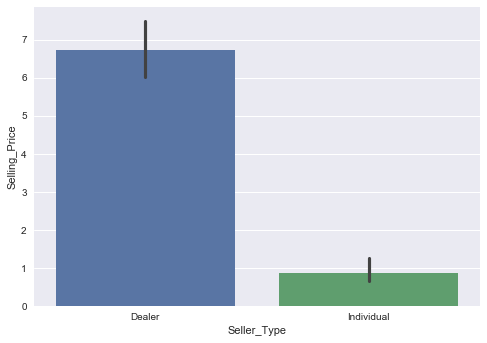

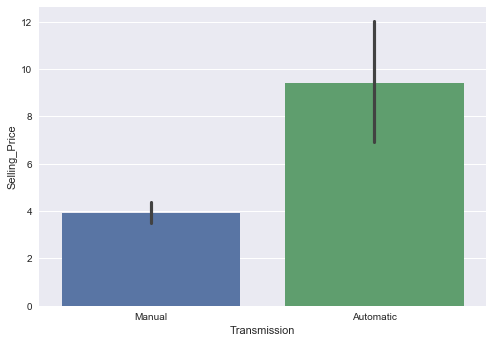

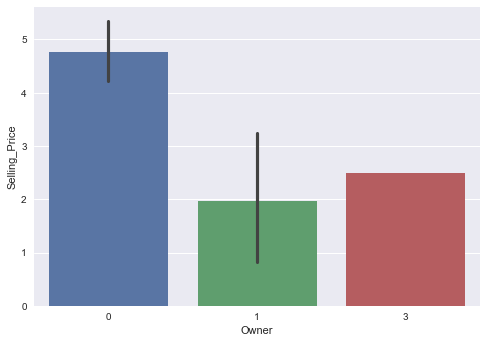

In [23]:
# selling price on categorical data
for i in list(data.columns)[4:len(list(data.columns))]:
    sns.barplot(x = i, y = 'Selling_Price', data= data, )
    plt.show()

In [24]:
## Prepare final data
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
data = pd.get_dummies(data,columns= ['Fuel_Type','Seller_Type', 'Transmission'], drop_first= True)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


### Variable Importance
- ***Note*** : the objective of variable importance is to give an idea of important attributes but depending on business lines we have to take decision whether we have to go with all attributes or drop some of them. 

In [26]:
X_data = data.drop(columns= 'Selling_Price', axis = 1)
y_data = data['Selling_Price']

In [27]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_data, y_data)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [29]:
et.feature_importances_

array([7.20531205e-02, 3.96746261e-01, 4.49755694e-02, 3.26505157e-04,
       2.08267084e-01, 1.72903648e-02, 1.19722617e-01, 1.40618479e-01])

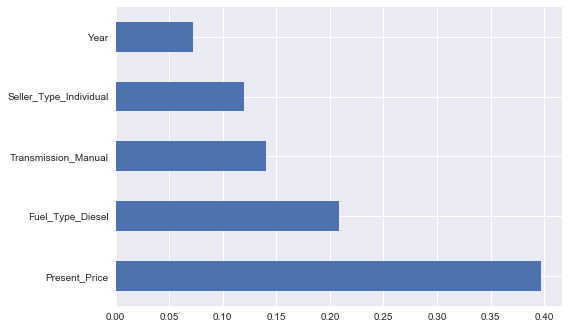

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(et.feature_importances_, index=X_data.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
X = X_data.iloc[:].values
y = y_data.iloc[:].values

### Split the data into train and test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 10)

### Scaling / Normalization

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Selection

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Linear Regression

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print("training score :{}".format(lr_model.score(X_train, y_train)))
print("testing score :{}".format(lr_model.score(X_test, y_test)))

training score :0.8891242736539995
testing score :0.8436773164235153


In [37]:
y_pred = lr_model.predict(X_test)
y_pred

array([ 7.78311122,  0.80492133,  1.88830514,  2.05092328,  5.25115027,
        6.80264993, 19.67617202, -3.31906928,  1.01503656,  4.40955539,
        0.06921872,  8.82362161,  4.36530362, -0.92527751,  5.86117097,
        3.39067632,  4.49404012, -7.32674476,  2.63008919,  5.8196613 ,
        2.02048028,  3.28380042,  7.1736321 , 21.400031  , -1.1927516 ,
        1.05496637, -1.28541438, -2.6264342 ,  1.53299396, -3.3484441 ,
       -0.21498222, 14.17717564,  4.59388907,  7.82766871,  0.03443517,
        6.65924906,  2.64179911,  3.584844  ,  1.63226888,  4.21150507,
        5.96754066,  0.30425128,  6.50030368,  0.03642455, 10.5096747 ,
        3.36778343, -0.82293639,  4.8383662 ,  8.91816649,  0.91559335,
       -1.1786691 ,  6.29141418,  0.87144646,  9.80802498,  4.69425292,
        4.53578149,  9.15581942, -0.03558632,  6.8589744 , 10.04709131,
        1.4740738 ])

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score : {}'.format(r2_score(y_test, y_pred)))

mae score : 1.2944987410104156
mse score : 5.075348220392424
rmse score : 2.2528533508403124
R2 score : 0.8436773164235153


### Decision Tree

In [39]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
print("training score :{}".format(dt_model.score(X_train, y_train)))
print("testing score :{}".format(dt_model.score(X_test, y_test)))

training score :1.0
testing score :0.9274078328707128


In [41]:
y_pred = dt_model.predict(X_test)
y_pred

array([ 8.65,  0.72,  2.95,  0.8 ,  4.9 ,  6.15, 18.75,  0.12,  0.6 ,
        3.65,  0.5 ,  7.2 ,  4.5 ,  0.45,  4.95,  3.49,  3.65,  0.16,
        2.95,  8.25,  0.8 ,  3.5 ,  6.4 , 23.5 ,  0.2 ,  0.4 ,  0.45,
        0.42,  0.65,  0.12,  2.95, 14.25,  4.5 , 11.25,  0.5 ,  6.15,
        2.7 ,  2.9 ,  1.1 ,  4.  ,  4.5 ,  0.55,  5.5 ,  0.25, 12.9 ,
        3.35,  0.16,  4.5 ,  6.95,  3.15,  0.45,  5.  ,  0.6 , 12.9 ,
        4.5 ,  3.  ,  9.15,  0.95,  9.1 ,  9.5 ,  2.65])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score : {}'.format(r2_score(y_test, y_pred)))

mae score : 0.722295081967213
mse score : 2.3568590163934426
rmse score : 1.5352065061070588
R2 score : 0.9274078328707128


### Randomforest

In [43]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
print("training score :{}".format(rf_model.score(X_train, y_train)))
print("testing score :{}".format(rf_model.score(X_test, y_test)))

training score :0.9836035869559012
testing score :0.9244848074614325


In [45]:
y_pred = rf_model.predict(X_test)
y_pred

array([ 8.9935,  0.6845,  2.4055,  0.7639,  5.1625,  5.7674, 20.664 ,
        0.1509,  0.5569,  4.079 ,  0.6232,  8.555 ,  4.6605,  0.4248,
        4.688 ,  3.4535,  4.5265,  0.1722,  2.679 ,  7.4905,  0.7715,
        3.627 ,  6.6126, 22.1825,  0.2307,  0.4254,  0.33  ,  0.2905,
        0.6984,  0.1399,  2.3015, 15.6866,  4.7845,  9.708 ,  0.5311,
        5.8433,  2.7365,  3.172 ,  1.134 ,  4.2385,  4.6595,  0.5132,
        5.637 ,  0.2352, 11.9906,  3.146 ,  0.1948,  4.459 ,  6.9095,
        2.6106,  0.3963,  5.4925,  0.5557, 11.3455,  4.37  ,  2.9675,
        9.6131,  1.0536,  8.6949,  9.5623,  2.493 ])

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score : {}'.format(r2_score(y_test, y_pred)))

mae score : 0.6148885245901636
mse score : 2.451761249836066
rmse score : 1.565810093796839
R2 score : 0.9244848074614325


### Xgbooooooooooooooooooost
- Note : the performer

In [47]:
import xgboost as xgb

In [48]:
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)

[14:54:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
print("training score :{}".format(xg.score(X_train, y_train)))
print("testing score :{}".format(xg.score(X_test, y_test)))

training score :0.9922577533738989
testing score :0.9391102637035851


In [50]:
y_pred = xg.predict(X_test)
y_pred

array([ 9.767074  ,  0.5860479 ,  2.5352464 ,  0.8624575 ,  5.188337  ,
        5.7042327 , 20.221378  ,  0.23098183,  0.53265667,  4.2060566 ,
        0.5112927 ,  8.776018  ,  4.231948  ,  0.24535659,  4.4723988 ,
        2.7857862 ,  4.2060566 ,  0.04309309,  2.604985  ,  7.278699  ,
        0.8624575 ,  3.564877  ,  7.08962   , 23.680367  ,  0.28602192,
        0.38533297,  0.31710613,  0.24535659,  0.72826964, -0.25112796,
        2.0816154 , 15.968545  ,  4.386447  ,  9.807086  ,  0.5112927 ,
        5.7546587 ,  2.8833544 ,  3.4837184 ,  1.191936  ,  4.311602  ,
        4.670818  ,  0.47485164,  5.849628  ,  0.15649074, 11.873009  ,
        3.0358248 ,  0.12971944,  4.262912  ,  7.171385  ,  2.4846673 ,
        0.18055573,  4.9110203 ,  0.45053673, 11.301954  ,  4.6354494 ,
        2.8906603 , 10.167953  ,  1.055505  ,  8.23433   ,  9.371815  ,
        2.3459854 ], dtype=float32)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score : {}'.format(r2_score(y_test, y_pred)))

mae score : 0.6148785041981056
mse score : 1.976914723325931
rmse score : 1.4060279952141532
R2 score : 0.9391102637035851
